In [4]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

In [5]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [6]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [7]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('./data','train',str(i))
    images = os.listdir(path)
    print(f'Loading images from {path}')

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

Loading images from ./data\train\0
Loading images from ./data\train\1
Loading images from ./data\train\2
Loading images from ./data\train\3
Loading images from ./data\train\4
Loading images from ./data\train\5
Loading images from ./data\train\6
Loading images from ./data\train\7
Loading images from ./data\train\8
Loading images from ./data\train\9
Loading images from ./data\train\10
Loading images from ./data\train\11
Loading images from ./data\train\12
Loading images from ./data\train\13
Loading images from ./data\train\14
Loading images from ./data\train\15
Loading images from ./data\train\16
Loading images from ./data\train\17
Loading images from ./data\train\18
Loading images from ./data\train\19
Loading images from ./data\train\20
Loading images from ./data\train\21
Loading images from ./data\train\22
Loading images from ./data\train\23
Loading images from ./data\train\24
Loading images from ./data\train\25
Loading images from ./data\train\26
Loading images from ./data\train\27
Lo

In [8]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [9]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model display
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         295168    
                                                        

In [10]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 [==============================] - 81s 323ms/step - loss: 1.8637 - accuracy: 0.5887 - val_loss: 0.3236 - val_accuracy: 0.9214
Epoch 2/35
246/246 [==============================] - 68s 275ms/step - loss: 0.3385 - accuracy: 0.9063 - val_loss: 0.1246 - val_accuracy: 0.9643
Epoch 3/35
246/246 [==============================] - 60s 246ms/step - loss: 0.2082 - accuracy: 0.9409 - val_loss: 0.0693 - val_accuracy: 0.9824
Epoch 4/35
246/246 [==============================] - 64s 260ms/step - loss: 0.1249 - accuracy: 0.9622 - val_loss: 0.0555 - val_accuracy: 0.9836
Epoch 5/35
246/246 [==============================] - 60s 243ms/step - loss: 0.1009 - accuracy: 0.9710 - val_loss: 0.0335 - val_accuracy: 0.9912
Epoch 6/35
246/246 [==============================] - 57s 233ms/step - loss: 0.0814 - accuracy: 0.9760 - val_loss: 0.0550 - val_accuracy: 0.9843
Epoch 7/35
246/246 [==============================] - 63s 256ms/step - loss: 0.0738 - accuracy: 0.9783 - val_loss: 0.0486 - val_ac

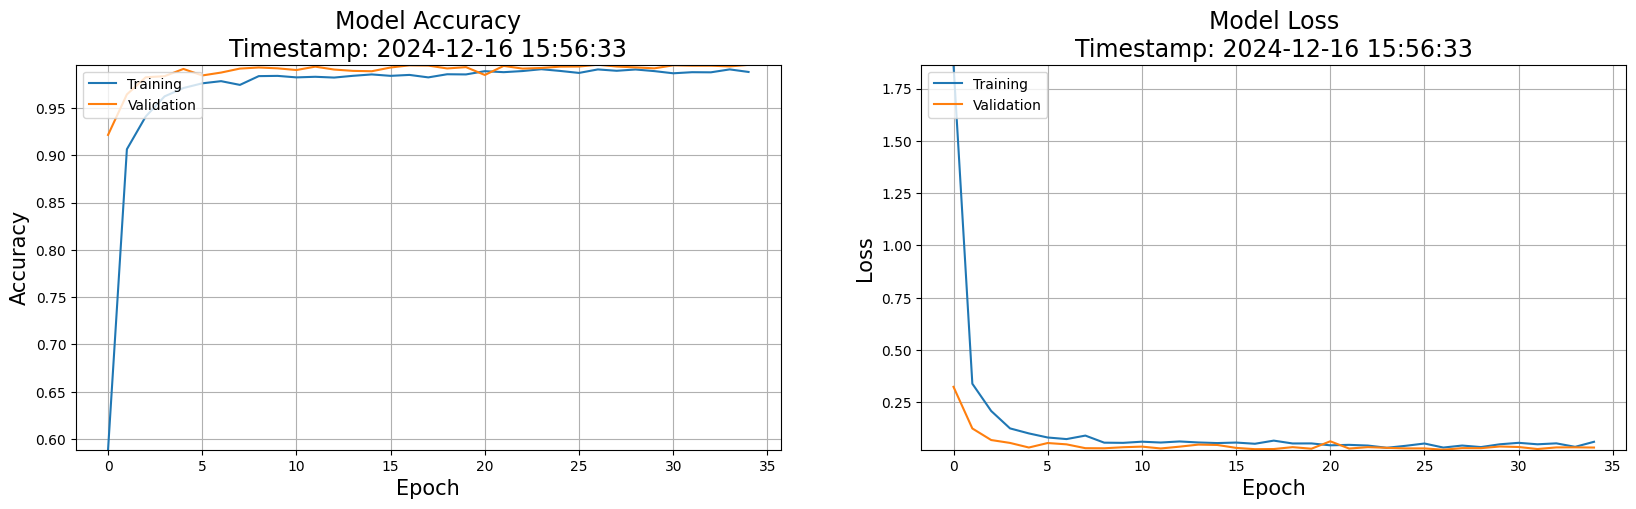

In [11]:
# Plotting the performance of the model
plot_performance(history=history1)

In [12]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('./data/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('./data/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [13]:
# Predicting the test data
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

395/395 [==============================] - 6s 15ms/step
0.965716547901821


In [14]:
# Saving the Model 
model.save('./model/traffic_classifier.keras')

(1, 30, 30, 3)
1/1 [==============================] - 0s 71ms/step
[[4.8766761e-08 4.6024043e-06 2.7356211e-07 7.3635027e-07 1.5065179e-07
  1.6513286e-06 4.1085730e-07 5.0710356e-09 2.4599633e-06 1.0354121e-06
  8.2562923e-07 1.1859217e-05 8.7748120e-08 2.2297243e-06 2.9057423e-07
  7.1539567e-08 9.7754969e-09 2.4105111e-06 2.9685232e-05 4.9299211e-07
  9.9882489e-01 5.7802777e-06 5.6670556e-06 1.0338856e-06 2.4626534e-06
  4.7583897e-05 9.5989148e-04 1.2552149e-05 3.2782187e-05 1.3050346e-06
  1.2926579e-06 3.3860337e-07 1.7641277e-08 3.9699617e-06 6.3728805e-08
  1.3068304e-06 1.1051944e-06 1.7372861e-06 1.3104822e-06 3.8008618e-06
  2.7707676e-05 4.1668095e-06 4.0077275e-08]]
1/1 [==============================] - 0s 5ms/step
Predicted class: [20]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.99      0.98       720
           2       0.97      0.95      0.96       750
           3       0.

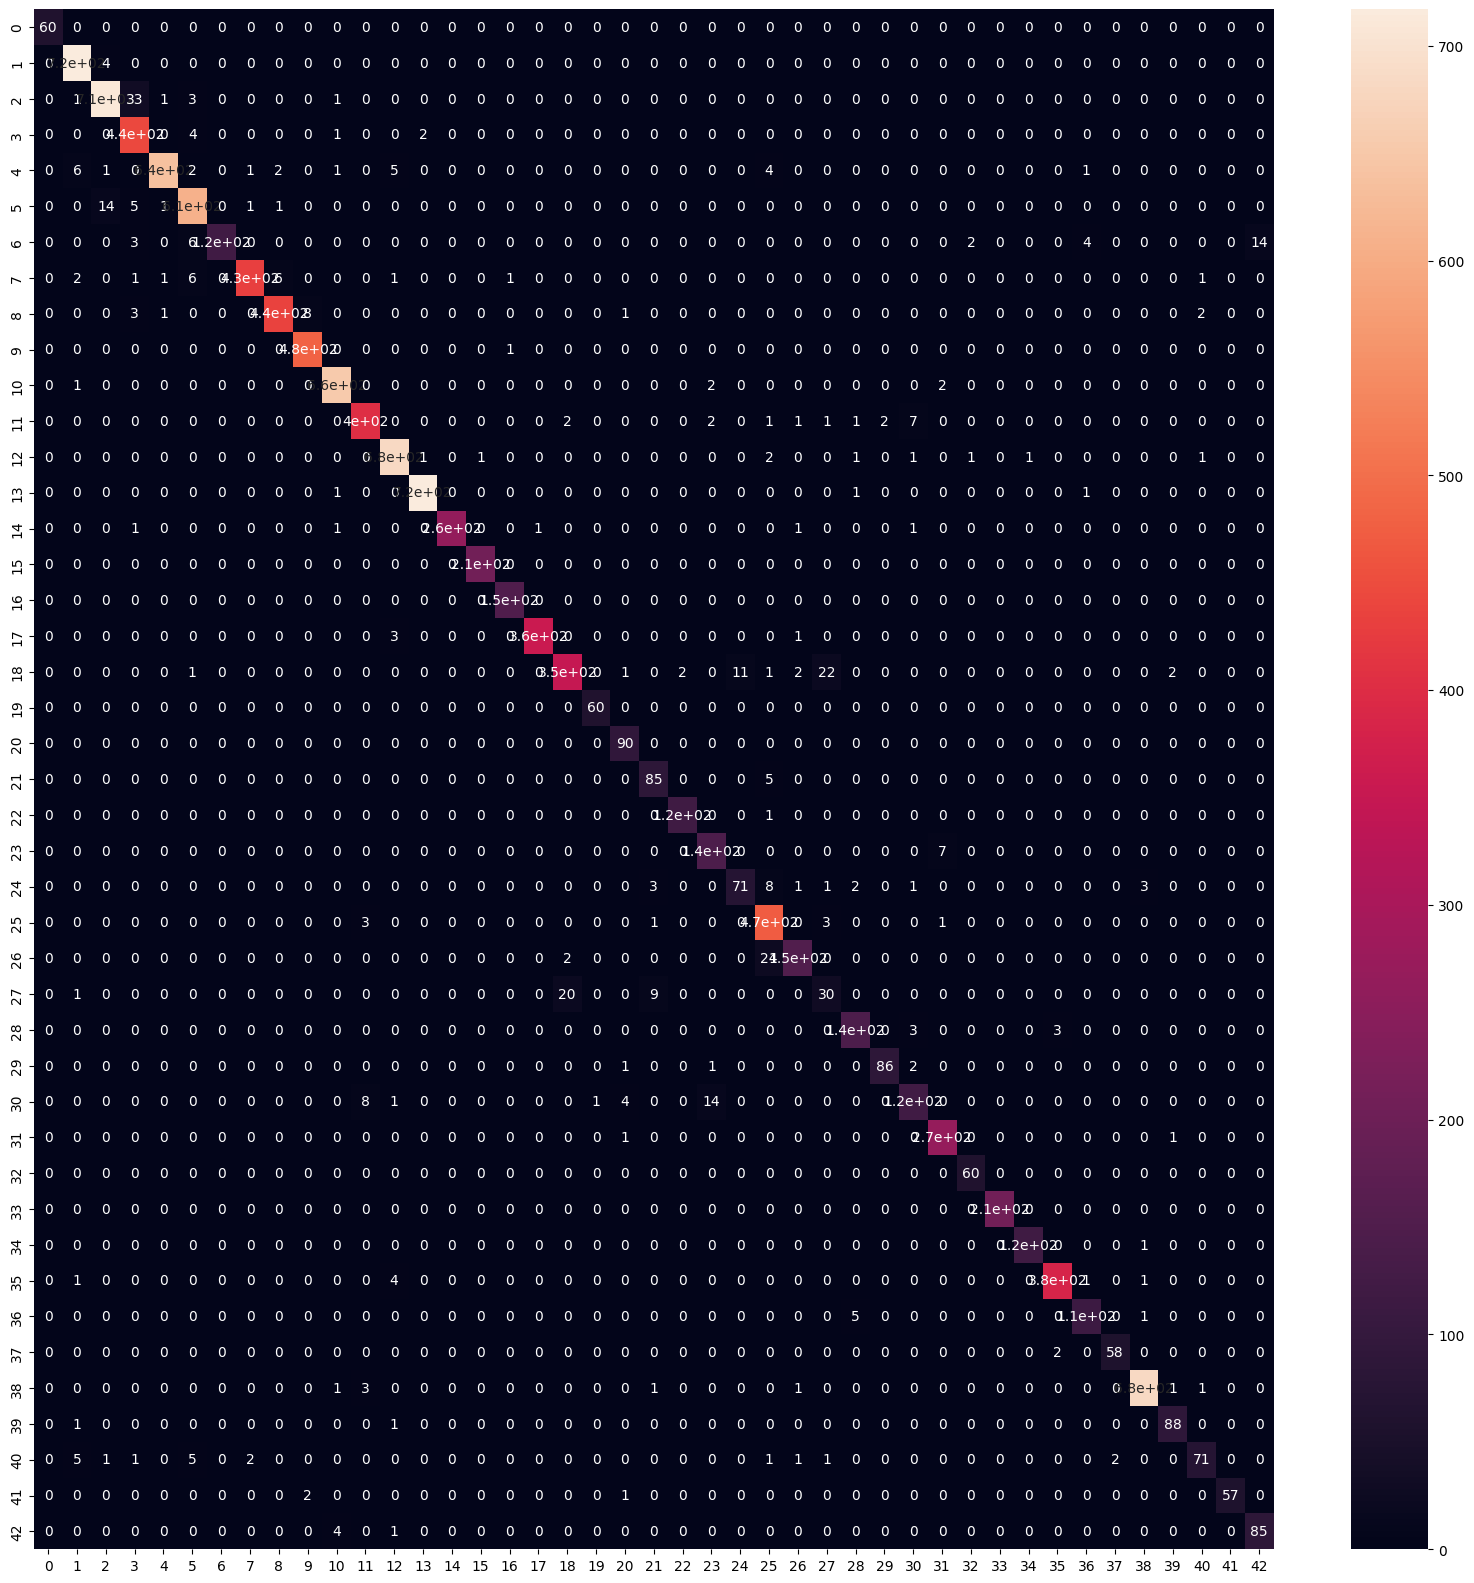

In [15]:
# Loading the model
new_model = tf.keras.models.load_model('./model/traffic_classifier.keras')
path = './data/Train/20/00020_00000_00000.png'
img = Image.open(path)
img = img.resize((30,30))
img = np.expand_dims(img, axis=0)
img = np.array(img)
print(img.shape)

# Predicting the class
print(new_model.predict(img))
print("Predicted class:", np.argmax(new_model.predict(img), axis=-1))

# Displaying the confusion matrix
cm = metrics.confusion_matrix(labels, pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True)

# Displaying the classification report
print(classification_report(labels, pred))
plt.show()